## Analysing data trends for global video-games sales 

My primary dataset that I have chosen to represent consists of information related to genres, platforms, region-wise sales, user & critic scores of various video games released over the years. The various interactive and informative visualizations in this article gives some very interesting and unique insights about this world of video games.


In [1]:
import pandas as pd
import bqplot
import bqplot.pyplot 
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt

In [2]:
#importing my dataset into the vaiable "game_data"
game_data = pd.read_csv("MyData.csv")

In [3]:
#importing the contextual dataset similar to my primary datset that contanins information on sales of various products 
sales_data = pd.read_excel("Sales.xlsx")

In [4]:
#Displaying the first few records of my dataset 
game_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Displaying the first few rows of the contextual dataset identified by me that is similar to my primary dataset. 
#This is the sales dataset which can be found here:
#https://data.world/vineet/salesdata/workspace/file?filename=SalesForCourse_quizz_table.xlsx
#The user will have to log in to data.world to access this data
sales_data.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [6]:
#Creating a pivot table to implement a interactive grid heat map in the future. 
mypivot = pd.pivot_table(game_data, index = 'Platform', columns='Genre',values = 'Global_Sales', aggfunc = 'mean',fill_value=0)

In [7]:
#Defining NA Sales for various Genres and Platforms of video games 
genre = game_data.groupby("Genre")["NA_Sales"].sum()
platform = game_data.groupby("Platform")["NA_Sales"].sum()

In [8]:
#Defining EU Sales for various Genres and Platforms of video games
genre2 = game_data.groupby("Genre")["EU_Sales"].sum()
platform2 = game_data.groupby("Platform")["EU_Sales"].sum()

In [9]:
#Defining JP Sales for various Genres and Platforms of video games
genre3 = game_data.groupby("Genre")["JP_Sales"].sum()
platform3 = game_data.groupby("Platform")["JP_Sales"].sum()

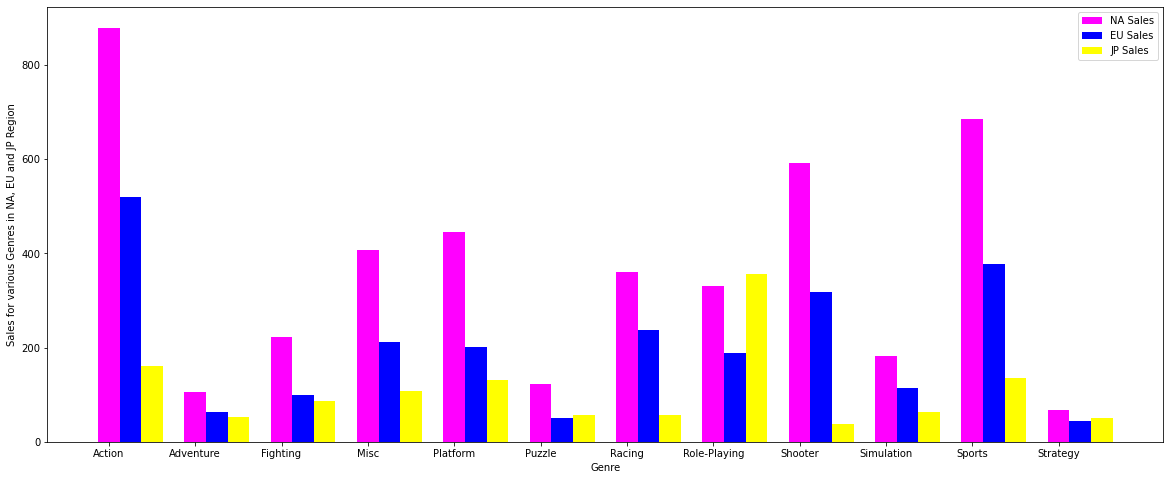

In [10]:
#Comparing the region-wise Sales for all games belonging to different Genres
fig, ax = plt.subplots(figsize=(20,8))
y=genre.reset_index()
z=genre2.reset_index()
b=genre3.reset_index()

x_axis = np.arange(len(y['Genre']))

plt.bar(x_axis ,y['NA_Sales'],color = 'Magenta', width=0.25)
plt.bar(x_axis+0.25 ,z['EU_Sales'],color = 'Blue', width=0.25)
plt.bar(x_axis+0.5 ,b['JP_Sales'],color = 'Yellow',width=0.25)


plt.xticks(x_axis, y['Genre'])

ax.set_xlabel("Genre")
ax.set_ylabel("Sales for various Genres in NA, EU and JP Region")
ax.legend(labels=['NA Sales', 'EU Sales','JP Sales'])
plt.show()

The above multiple bar chart gives an at-a-glance overview of number of copies sold of all the games of different genres. This visualization compares the sales of all these games in different regions like, North America, Europe, and Japan. This comparable view gives user an idea about what genre is popular in which region. For instance, more "Role-Playing" video games have been sold in Japan than America or Europe and Action and sports seem widely popular in NA region. 

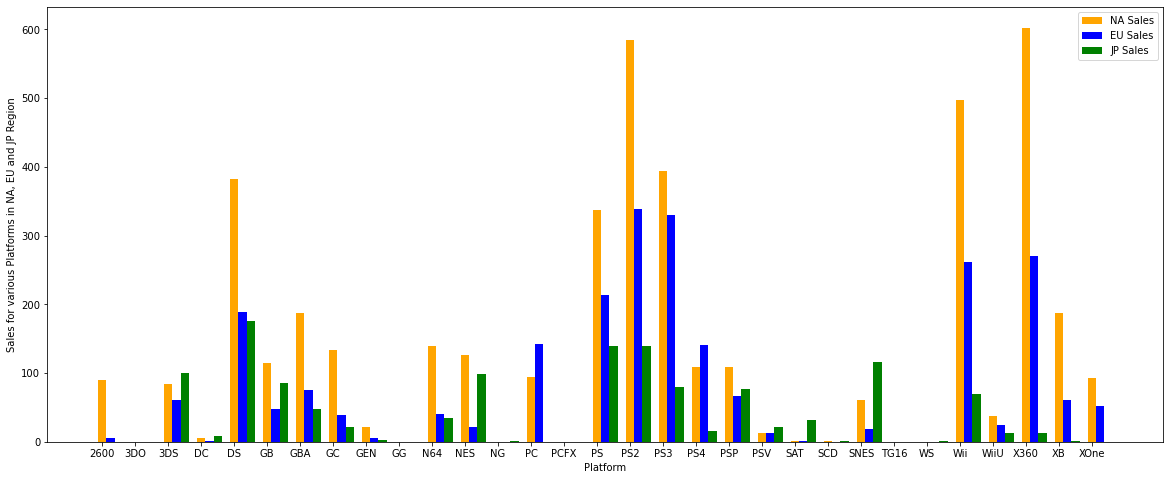

In [11]:
#Comparing region wise sales for all games across different platforms
fig, ax = plt.subplots(figsize=(20,8))
h=platform.reset_index()
e=platform2.reset_index()
m=platform3.reset_index()

x2_axis = np.arange(len(h['Platform']))

plt.bar(x2_axis ,h['NA_Sales'],color = 'Orange', width=0.25)
plt.bar(x2_axis+0.25 ,e['EU_Sales'],color = 'Blue', width=0.25)
plt.bar(x2_axis+0.5 ,m['JP_Sales'],color = 'Green',width=0.25)


plt.xticks(x2_axis, h['Platform'])

ax.set_xlabel("Platform")
ax.set_ylabel("Sales for various Platforms in NA, EU and JP Region")
ax.legend(labels=['NA Sales', 'EU Sales','JP Sales'])
plt.show()

Similar to the first visualization the above graph shows the number of video games sold in each platform like Wii, PC, PS4 and so on. The multiple bars add an extra dimension of comparing the sales in each region like NA, EU, and JP. Therefore essentially, the viewer or the user can get information like the popularity of various platforms in each region based on the number of video games sold for each platform. for instance, X360 and PS2 seem very popular in the NA region while people in Europe prefer games that are played on PS3 more than X360 or Wii. 

In [12]:
#Defining bins to make interactive bar charts to get information on sales of various regions compared to the global sales of 
#all video games of particular region or a particular genre
field_bin= ["Genre","Platform"]
region_bin=["NA_Sales","EU_Sales","JP_Sales"]

In [15]:
#Refered to this code from Kamdar-Hem-Homework4.ipynb 
@ipywidgets.interact(Field = field_bin,Region=region_bin,style=plt.style.available)
def make_plot(style,Field,Region):
    with plt.style.context(style): 
        fig, ax = plt.subplots(1,1,figsize=(15,3))
        if Region in ["NA_Sales"]:
            df=game_data.groupby(Field)["Global_Sales"].sum()
            df2=game_data.groupby(Field)["NA_Sales"].sum()
            ax.bar(df.index,df.values)
            ax.bar(df2.index,df2.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("NA Sales compared to Global Sales(Millions of Copies Sold)")
            ax.legend(labels=['Global Sales', 'NA Sales'])
        
        elif Region in ["EU_Sales"]:
            df3=game_data.groupby(Field)["Global_Sales"].sum()
            df4=game_data.groupby(Field)["EU_Sales"].sum()
            ax.bar(df3.index,df3.values)
            ax.bar(df4.index,df4.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("EU Sales compared to Global Sales(Millions of Copies Sold)")
            ax.legend(labels=['Global Sales', 'EU Sales'])
        
        else :
            df5=game_data.groupby(Field)["Global_Sales"].sum()
            df6=game_data.groupby(Field)["JP_Sales"].sum()
            ax.bar(df5.index,df5.values)
            ax.bar(df6.index,df6.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("JP Sales compared to Global Sales(Millions of Copies Sold)")
            ax.legend(labels=['Global Sales', 'JP Sales'])
         

    plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

The two multiple bar chart as discussed above leads to this interactive bar chart, where the user can select what they want to view as well as how they want to see it. It makes the entire process of getting information easy, fun and intuitive for the user.

In the above interactive plot, the user has the choice to select the style they want the visualization to appear in, combined with what they want to see. For instance, a user can select if they want to view number of copies of video games sold for every gaming console or if they want to view and compare the sales of various genres these video games belong to. Also, the interactive visualization gives the user a choice of an extra dimension, that is to choose the region for which they want to see the number of video games sold. By default, this number of sales will be represented as a stacked bar chart to give the user additional information on the number of sales in each region compared to the total global sales.

An example of what user can select is that a user might want to compare which genre is popular across the NA region and overall which genre is popular globally with respect to the highest number of copies sold. The user can select "Genre" from the "Field" dropdown and further can select "NA_sales" from the "Region" drop down. The user can additionally choose the style they would wish to see this plot in from the style drop down. These choices will then go on to display the requested information. The user can get interesting insights like Globally Action games are sold most followed by sports video games and that this trend is also followed in the NA region where "Action" games are sold the most which is closely followed by the "sports" video games. While in the Japan region far more "Role-Playing" games are sold than any other genre which is followed by Action, platform, and sports video games. Also, it can be observed that "Shooter" video games are relatively popular globally but not so much in Japan.


In [16]:
#Implementing an interactive dashboard of my primary data that sheds light on mean global sales of games belonging to a 
#specific platform and genre and further displaying total global sales over the years for the same 
#plotting the bar plot
#Refered to this code from my Homework 6 Assignment(Kamdar-Hem-Homework6.ipynb)
# Scale for bar plot
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

# Axes for bar plot
ax_xb = bqplot.Axis(scale = x_scale, label = 'Year of Release')
ax_yb = bqplot.Axis(scale = y_scale, label = 'Total Global sales (Millions of copies)', orientation = 'vertical')

# Mark
bp = bqplot.pyplot.bar(x = [], y = [], scales={'x': x_scale, 'y': y_scale})

figurebar = bqplot.Figure(marks = [bp], axes=[ax_xb, ax_yb])

In [17]:
#Now that I have the required data using pivot, I made the heat map.
#Refered to this code from my Homework 6 Assignment(Kamdar-Hem-Homework6.ipynb)

# 1. data (mypivot)

# 2. scales
col_sc = bqplot.ColorScale(scheme='RedPu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale() 

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Genre')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Platform')

# 4. Marks
heat_map = bqplot.GridHeatMap(color=mypivot.values, 
                             row = mypivot.index, column = mypivot.columns, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})
def barplot_fig(x, y):
    df2 = game_data[(game_data['Genre'] == y) & (game_data['Platform'] == x)]
    df2 = df2[df2['Year_of_Release'] != 0]
    df2 = df2.groupby('Year_of_Release')['Global_Sales'].sum()
    return df2

    
# 5. linking 
mySelectedLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1: # only allow user to select 1 bin
        i,j = change['owner'].selected[0]
        v = mypivot.values[i,j] # data value in that bin
        mySelectedLabel.value = 'Mean Global Sales of a game played on: ' + mypivot.index[i] + ' of Genre: ' + mypivot.columns[j] + ' = ' + str(v)
        game_new = barplot_fig(mypivot.index[i], mypivot.columns[j])
     
        bp.x = game_new.index
        bp.y = game_new.values
heat_map.observe(on_selected, 'selected')


# 6. figure!
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig.layout.min_width='500px'
figurebar.layout.min_width = '500px'
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard_final = ipywidgets.VBox([myDashboard, figurebar])
myDashboard_final

Summary:
The above dashboard is in lines with the interactive visualization designed previously and it consists of 2 simple visualizations that are linked together. This dashboard combines the dimensions of "Genre" and "Platform “that the user has been viewing atomically and getting insights from. The Grid heat map, that is the cells that look like different shades of red, represents the mean sales of all games launched on a specific gaming console, for instance PS3, PS4,X360, etc. and belonging to a specific genre like Action, adventure, Racing, sports etc. and the bar chart goes on to show the total global sales each year(That is millions of copies sold per year)for the selected platform and genre of games when the games were released. Essentially selecting a cell in the grid will give the user information on mean sales of all video games of a specific genre that are played on a particular genre. for example, on an average 0.7 million copies of a "Puzzle" video game are sold that are played on GBA (Game boy advance)

Working: 
The dashboard is very user friendly and gives a lot of sales related information by just one click of the mouse. The cells present in the grid heat map, that is the top component of the dashboard are clickable. As soon as you click on one of the cells, one line above the component talks about your selection and gives the exact value of the cell, it will look something like this:
"Mean Global Sales of a game played on: PS4 of Genre: Shooter = 2.16" which means on an average 2.16 million copies of a shooter game are sold which is played on PS4. That means if someone were to launch a shooting game for the PS4 console they might expect to sell approximately 2.16 million copies of that video games across the world.
Further, the bar chart breaks the sales down to all years when shooting games were launched on PS4 and shows the total sales of all shooting games launched on PS4 for that specific year. To summarize, the bar graph represents the total global sales of all games launched on a specific platform and belonging to a specific genre for a certain year. For instance, in 2014 an aggregate of more than 20 million copies of shooting games were sold worldwide which increased to upwards of 30 million the following year.


In [18]:
#Now analyzing and visualizing the contextual sales dataset
country = sales_data.groupby("Country")["Revenue"].sum()

In [19]:
#Creating various bins to implement interactive bar charts that shows total revenue or total cost 
#for countries or product sub categories 
region_bin=["Country","Sub Category"]
cost_revenue=["Revenue with Cost","Revenue"]

In [20]:
@ipywidgets.interact(Field = region_bin,style=plt.style.available,Cost_or_Revenue=cost_revenue)
def make_plot2(style,Field,Cost_or_Revenue):
    with plt.style.context(style): 
        fig, ax = plt.subplots(1,1,figsize=(25,7))
        if Cost_or_Revenue in ['Revenue']:
            dfs=sales_data.groupby(Field)["Revenue"].sum()
            ax.bar(dfs.index,dfs.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Revenue")
        else:
            dfs2=sales_data.groupby(Field)["Revenue"].sum()
            dfs=sales_data.groupby(Field)["Cost"].sum()
            ax.bar(dfs2.index,dfs2.values)
            ax.bar(dfs.index,dfs.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Revenue and Cost")
            ax.legend(labels=['Revenue', 'Cost'])
            
        #ax.set_yscale('log')
    plt.show()
      

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

The above interesting and interactive plot represents information from a contextual dataset that is like my primary dataset. It shows vital sales information on sales of various products in different countries and has information on the revenue that these products made which I think would have been useful if present in my primary dataset to analyze the number of copies sold along with the amount of money the video game made. This is the reason I chose to play around with this data and to get information and perform analysis based on what products makes the most money and not just which product is popular. Further, I believe having the "Revenue" dimension in tandem with the number of copies sold in my primary dataset would help to analyze users which gaming platform or genre is vital in terms of making the most money for a developer in a certain region.

Again, the interactive bar chart here gives the user the freedom to select what they want to see and how do they want to view it. 
The user has the choice to view information on total revenue generated by all products in various countries. This gives an idea about the spending capacity of each country and at a higher-level help anyone make decisions on marketing and distribution channels based on region and money the products are making for them. But for this latter insight having additional information like what products generate the highest revenue may help in making more effective decisions (Something that lacked in my primary dataset) and this visualization also sheds light on that as the user can select "Sub-Category" from the "Field" dropdown. This gives the user vital information like Mountain bikes generate the highest revenue followed by Road bikes. To generate additional information the user has the option to view the costs along with this revenue to analyze the costs in each country and costs incurred for each product subcategory. This will help a user make a well-rounded and informed decision. 

But the user might want a combination of the information presented in this plot, like the user might be interested in knowing the revenue a certain product generated in a particular country. This information can be explored in the next dashboard that I have implemented. 


In [21]:
#Creating a pivot table to show mean revenue of various product subcategories in a specific country 
mypivot2 = pd.pivot_table(sales_data, index = 'Sub Category', columns='Country',values = 'Revenue', aggfunc = 'mean',fill_value=0)

In [22]:
#plotting the bar plot
#Refered to this code from my Homework 6 Assignment(Kamdar-Hem-Homework6.ipynb)
# Scale for bar plot
x2_scale = bqplot.OrdinalScale()
y2_scale = bqplot.LinearScale()

# Axes for bar plot
ax_xb2 = bqplot.Axis(scale = x2_scale, label = 'Year')
ax_yb2 = bqplot.Axis(scale = y2_scale, label = 'Total Revenue', orientation = 'vertical')

# Mark
bp1 = bqplot.pyplot.bar(x = [], y = [], scales={'x': x2_scale, 'y': y2_scale})

figurebar1 = bqplot.Figure(marks = [bp1], axes=[ax_xb2, ax_yb2])

In [23]:
#Now that I have the required data using pivot, I made the heat map.
#Refered to this code from my Homework 6 Assignment(Kamdar-Hem-Homework6.ipynb)

# 1. data (mypivot)

# 2. scales
col_sc = bqplot.ColorScale(scheme='RedPu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale() 

# 3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Country')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Sub Category')

# 4. Marks
heat_map_new = bqplot.GridHeatMap(color=mypivot2.values, 
                             row = mypivot2.index, column = mypivot2.columns, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})
def barplot_fig2(x, y):
    dfsd = sales_data[(sales_data['Country'] == y) & (sales_data['Sub Category'] == x)]
    dfsd = dfsd[dfsd['Year'] != 0]
    dfsd= dfsd.groupby('Year')['Revenue'].sum()
    return dfsd

    
# 5. linking 
mySelectedLabel2 = ipywidgets.Label()
def on_selected(change_new):
    if len(change_new['owner'].selected) == 1: # only allow user to select 1 bin
        i,j = change_new['owner'].selected[0]
        v = mypivot2.values[i,j] # data value in that bin
        mySelectedLabel2.value = 'Mean Global Sales for Product Sub-Category: ' + mypivot2.index[i] + ' in Country: ' + mypivot2.columns[j] + ' = ' + str(v)
        sales_new = barplot_fig2(mypivot2.index[i], mypivot2.columns[j])
     
        bp1.x = sales_new.index
        bp1.y = sales_new.values
heat_map_new.observe(on_selected, 'selected')


# 6. figure!
fig7 = bqplot.Figure(marks=[heat_map_new], axes=[col_ax, x_ax, y_ax])
fig7.layout.min_width='600px'
figurebar1.layout.min_width = '500px'
myDashboard2 = ipywidgets.VBox([mySelectedLabel2, fig7])
myDashboard_final2 = ipywidgets.VBox([myDashboard2, figurebar1])
myDashboard_final2

Finally, this simple interactive dashboard combines the insights gained in the interactive bar plot to a singular view. The colorful grid heat map shows the mean revenue generated by a particular product in a certain country, and further the bar graph shows the total revenue generated by that product in that country for a certain year. 
This aligns with the dashboard created for my primary data set but here a user can leverage the information on revenue generated for the analysis. 
The working is like that of the dashboard created using the primary dataset. A user can select any cell from the grid heat map and information on the selection pops up above the plot which gives information in the lines of: Mean Global Sales for Product Sub-Category: Hydration Packs in Country: United Kingdom = 1099.2272727272727. This gives a numeric value of revenue generated by selling Hydration Packs in United Kingdom. 
As soon as the user selects a cell the bar plot below the heat map gives information on total revenue that product subcategory generated in that country in a specific year. 
